### Importing data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")

df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

### Splitting the data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test

(     Age  EstimatedSalary
 121   37            72000
 108   26            86000
 135   23            63000
 88    26            81000
 138   28            59000
 ..   ...              ...
 230   35           147000
 381   48            33000
 150   26            15000
 320   52           138000
 12    20            86000
 
 [320 rows x 2 columns],
      Age  EstimatedSalary
 125   39            61000
 111   37            71000
 169   29            47000
 195   34            43000
 217   40            78000
 ..   ...              ...
 160   32           100000
 35    35            27000
 377   42            53000
 264   48            90000
 50    24            32000
 
 [80 rows x 2 columns],
 121    0
 108    0
 135    0
 88     0
 138    0
       ..
 230    1
 381    1
 150    0
 320    1
 12     0
 Name: Purchased, Length: 320, dtype: int64,
 125    0
 111    0
 169    0
 195    0
 217    0
       ..
 160    1
 35     0
 377    0
 264    1
 50     0
 Name: Purchased, Length: 80, dtyp

### Performing feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test

(array([[-0.05206137,  0.06156972],
        [-1.10525688,  0.4636577 ],
        [-1.39249202, -0.19691541],
        [-1.10525688,  0.32005485],
        [-0.91376679, -0.31179769],
        [-0.62653165,  1.38271593],
        [-0.81802174, -0.7713268 ],
        [ 1.00113415,  1.95712733],
        [-0.24355146, -1.37445877],
        [-0.62653165,  0.54981941],
        [-0.24355146, -0.34051826],
        [-0.24355146, -0.88620908],
        [ 0.04368368, -0.25435655],
        [ 0.9053891 , -0.57028281],
        [ 1.09687919, -0.13947427],
        [ 0.42666386,  0.26261371],
        [-1.29674698, -1.46062048],
        [-0.43504156, -0.54156224],
        [-0.24355146, -0.74260623],
        [-0.05206137,  0.11901086],
        [ 0.04368368, -0.57028281],
        [ 1.86283957, -0.28307712],
        [-0.81802174,  0.29133428],
        [ 0.42666386,  0.57853998],
        [-0.24355146, -0.13947427],
        [-0.7222767 , -1.57550276],
        [ 0.80964405,  0.26261371],
        [ 0.713899  , -1.259

### Training the model

In [17]:
from sklearn import svm

svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

### Predicting results

In [18]:
y_pred = svc.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### Showing the confusion matrix and accuracy

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[46  4]
 [ 5 25]]


0.8875

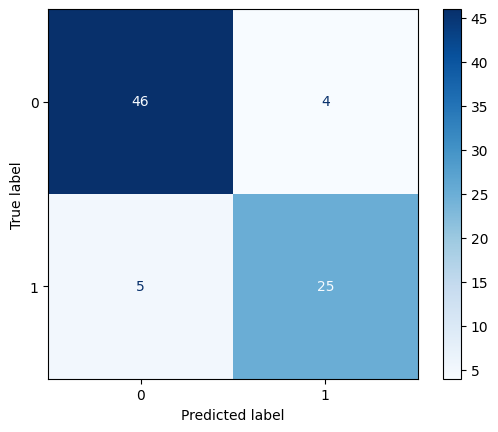

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()